In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Regressão linear:

## Exemplo de entrada unidimensional

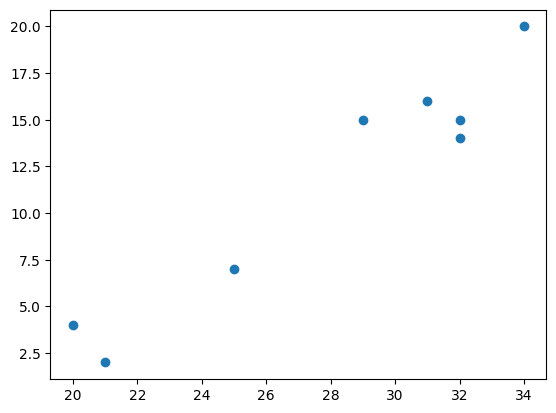

In [ ]:
X = [[20], [21], [25], [29], [31], [32], [32], [34]] # temperaturas
Y = [   4,    2,    7,   15,   16,   14,   15,  20]  # clientes
plt.scatter(X, Y)

In [ ]:
from sklearn import linear_model
regressao_linear = linear_model.LinearRegression()

regressao_linear.fit(X, Y)
a = regressao_linear.coef_
b = regressao_linear.intercept_
print(a, b)
# y = 1.16x - 20.85

[1.16] -20.85500000000001


In [ ]:
X2 = [[40], [41], [18]]
regressao_linear.predict(X2).astype(int)

array([25, 26,  0])

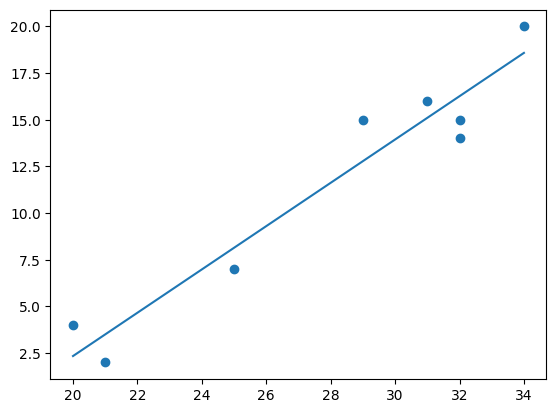

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.plot(X, regressao_linear.predict(X))
plt.show()

## Exemplo de entrada multi-dimensional

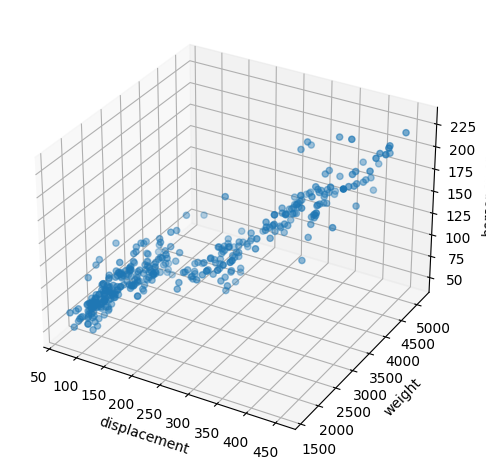

In [ ]:
fig = plt.figure(layout='tight')
ax = fig.add_subplot(projection='3d')
mpg = sns.load_dataset('mpg').dropna()

ax.set_xlabel('displacement')
ax.set_ylabel('weight')
ax.set_zlabel('horsepower')
ax.scatter(mpg['displacement'], mpg['weight'], mpg['horsepower'])

In [ ]:
X = np.array(mpg[['displacement', 'weight']])
Y = np.array(mpg['horsepower'])

display(mpg[['displacement', 'weight']].head())
display(mpg['horsepower'].head())

,displacement,weight
0,307.0,3504
1,350.0,3693
2,318.0,3436
3,304.0,3433
4,302.0,3449


,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


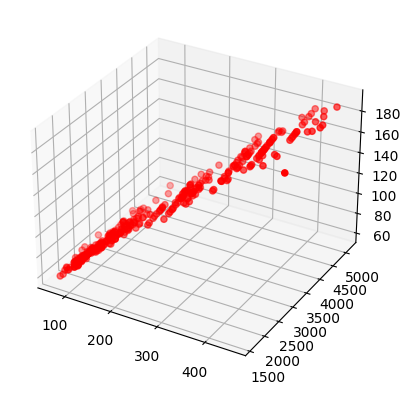

In [ ]:
regressao_linear = linear_model.LinearRegression()
regressao_linear.fit(X, Y)
Y_previsto = regressao_linear.predict(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], Y_previsto, c='red')


# Classificação linear

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0


,sex
0,Male
1,Female
2,Female
4,Female
5,Male


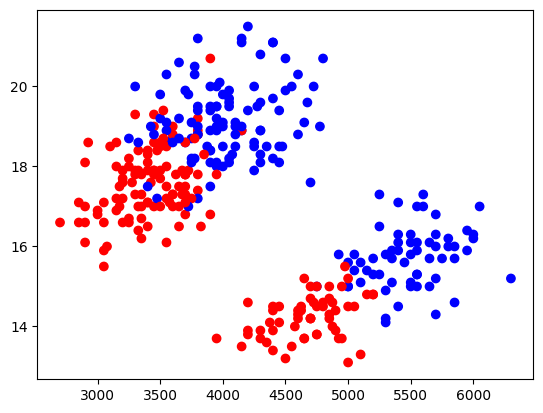

In [ ]:
penguins = sns.load_dataset('penguins').dropna()
X = np.array(penguins[['bill_depth_mm', 'body_mass_g']]) # Lista de vetores [grossura_bico, peso]
Y = np.array(penguins['sex']) # Lista de categorias Macho / Fêmea

cores = ['red' if s == 'Female' else 'blue' for s in penguins['sex']]
plt.scatter(penguins['body_mass_g'], penguins['bill_depth_mm'], c = cores)
display(penguins[['bill_depth_mm', 'body_mass_g']].head())
display(penguins['sex'].head())

In [ ]:
from sklearn import svm
classificador = svm.LinearSVC()

classificador.fit(X, Y)
taxa = classificador.score(X, Y)
print(f'Taxa de acerto: {round(100*taxa, 2)}%')

Taxa de acerto: 89.79%


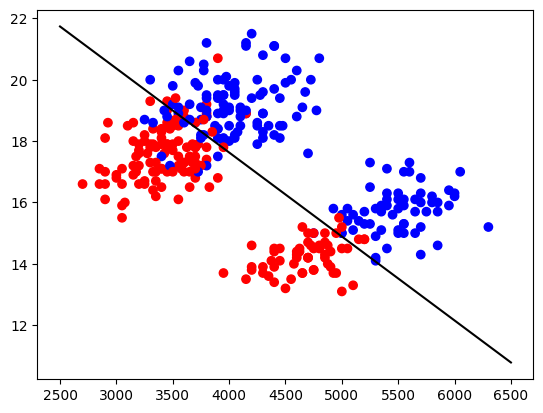

In [ ]:
fig, ax = plt.subplots()
ax.scatter(penguins['body_mass_g'], penguins['bill_depth_mm'], c = cores)
w = classificador.coef_
b = classificador.intercept_
a = -(w[0][1]/w[0][0])
b = -b[0]/w[0][0]
ax.plot(np.linspace(2500, 6500, 100), a*np.linspace(2500, 6500, 100)+b, c='black')

# Kernels

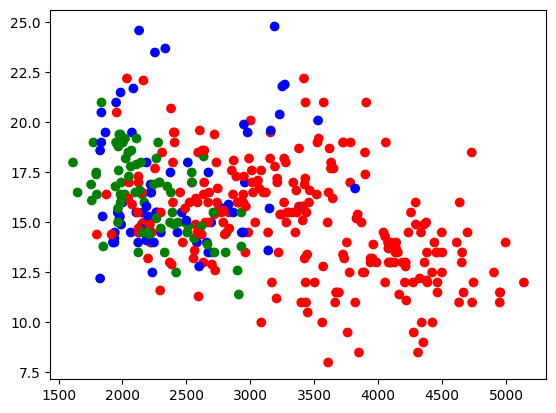

In [ ]:
mpg = sns.load_dataset('mpg').dropna()
X = np.array(mpg[['weight', 'acceleration']])
Y = np.array(mpg['origin'])

cores = ['red' if s == 'usa' else s for s in mpg['origin']]
cores = ['blue' if s == 'europe' else s for s in cores]
cores = ['green' if s == 'japan' else s for s in cores]
plt.scatter(X[:,0], X[:,1], c = cores)

In [ ]:
from sklearn import svm

classificador_linear = svm.SVC(kernel='linear')
classificador_linear.fit(X, Y)
taxa1 = classificador_linear.score(X, Y)

classificador_rbf = svm.SVC(kernel='rbf')
classificador_rbf.fit(X, Y)
taxa2 = classificador_rbf.score(X, Y)

print(f'Taxa de acerto (linear): {round(100*taxa1, 2)}%')
print(f'Taxa de acerto (rbf): {round(100*taxa2, 2)}%')

Taxa de acerto (linear): 67.86%
Taxa de acerto (rbf): 69.13%


# Clustering

## DBSCAN

In [ ]:
!gdown 1WWJsFRPErzUWSzmbkyfaT7voJkrT8r0D

Downloading...
From: https://drive.google.com/uc?id=1WWJsFRPErzUWSzmbkyfaT7voJkrT8r0D
To: /content/pony.csv
100% 18.1k/18.1k [00:00<00:00, 46.4MB/s]


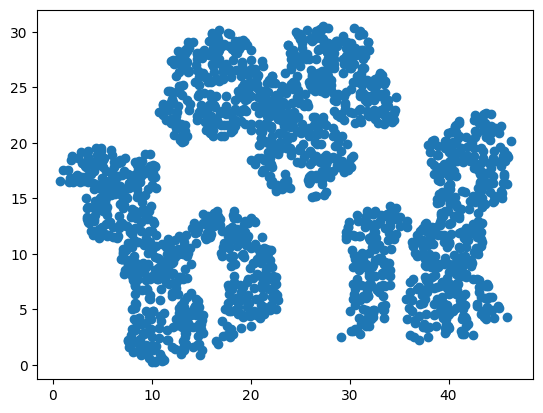

In [ ]:
data = pd.read_csv('/content/pony.csv')
plt.scatter(data['X'], data['Y'])

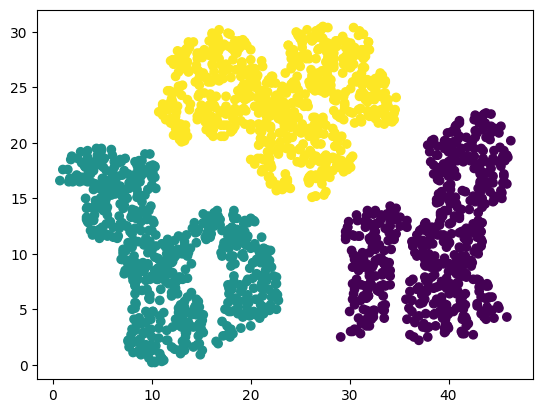

In [ ]:
from sklearn import cluster
dbscan = cluster.DBSCAN(eps=2)
dbscan.fit(data[['X', 'Y']])

labels = dbscan.labels_

plt.scatter(data['X'], data['Y'], c=labels)
plt.show()
